# Desafío Técnico - Mercado Libre

#### Ezequiel Panzarasa

# Análisis exploratorio de datos

## Armado de Dataset
Después de explorar un poco la API pública de Mercado Libre, se decidió optar por el armado de un dataset de 10.000 registros. Siendo que la API tiene un offset máximo de 1000, se decidió tomar las 10 categorías más populares (de acuerdo a la página principal de MercadoLibre. Ver imagen adjunta) y armar el dataset con 1.000 registros de cada categoría. <br>
Se eligieron estas 10 categorías siguiendo la hipótesis de que a mayor popularidad se tiene un mayor número de ventas, y más representativa resulta la información obtenida en la muestra para cada una de las publicaciones. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 103)

##### Ver armado de dataset en MLC_03_RAW_DATASET.ipynb

In [2]:
raw_dataset_df = pd.read_csv("raw_dataset.csv", header=0, index_col=0, sep='|')
raw_dataset_df

/home/eze/Desktop/Panza/virtual_envs/UWML_spec/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (102) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,site_id,title,price,sale_price,currency_id,available_quantity,sold_quantity,buying_mode,listing_type_id,stop_time,condition,permalink,thumbnail,thumbnail_id,accepts_mercadopago,attributes,original_price,category_id,official_store_id,domain_id,catalog_product_id,tags,catalog_listing,order_backend,seller.id,seller.permalink,seller.registration_date,seller.car_dealer,seller.real_estate_agency,seller.tags,seller.eshop.nick_name,seller.eshop.eshop_rubro,seller.eshop.eshop_id,seller.eshop.eshop_locations,seller.eshop.site_id,seller.eshop.eshop_logo_url,seller.eshop.eshop_status_id,seller.eshop.seller,seller.eshop.eshop_experience,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.period,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.metrics.claims.period,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.delayed_handling_time.value,seller.seller_reputation.metrics.delayed_handling_time.period,seller.seller_reputation.metrics.sales.period,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,seller.seller_reputation.metrics.cancellations.period,seller.seller_reputation.level_id,prices.id,prices.prices,prices.presentation.display_currency,prices.payment_method_prices,installments.quantity,installments.amount,installments.rate,installments.currency_id,address.state_id,address.state_name,address.city_id,address.city_name,shipping.free_shipping,shipping.mode,shipping.tags,shipping.logistic_type,shipping.store_pick_up,seller_address.id,seller_address.comment,seller_address.address_line,seller_address.zip_code,seller_address.country.id,seller_address.country.name,seller_address.state.id,seller_address.state.name,seller_address.city.id,seller_address.city.name,seller_address.latitude,seller_address.longitude,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,differential_pricing.id,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.metrics.claims.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,seller.seller_reputation.metrics.cancellations.excluded.real_value,seller.seller_reputation.protection_end_date,seller.seller_reputation.real_level,seller.eshop.eshop_rubro.id,seller.eshop.eshop_rubro.name,seller.eshop.eshop_rubro.category_id,seller.car_dealer_logo
0,MLA900810750,MLA,Repetidor Tp-link Tl-wa850re Blanco 1 Unidad,2055.00,NaN,ARS,83,3179,buy_it_now,gold_special,2040-12-07T04:00:00.000Z,new,https://www.mercadolibre.com.ar/repetidor-tp-l...,http://http2.mlstatic.com/D_668117-MLA31786420...,668117-MLA31786420833_082019,True,"[{'value_name': 'wa850re', 'values': [{'id': N...",NaN,MLA430901,NaN,MLA-ROUTERS_AND_WIRELESS_SYSTEMS,MLA6186903,"['brand_verified', 'good_quality_picture', 'im...",True,1,25679280,http://perfil.mercadolibre.com.ar/MIPCSTORE,2010-03-25T13:17:41.000-04:00,False,False,"['normal', 'user_info_verified', 'eshop', 'cre...",MIPCSTORE,NaN,87206.0,[],MLA,http://resources.mlstatic.com/eshops/25679280.jpg,2.0,25679280.0,0.0,48927.0,2654.0,historic,0.01,0.99,0.00,46273.0,platinum,0.0070,78.0,60 days,0.0001,2.0,60 days,60 days,10628.0,0.0083,93.0,60 days,5_green,MLA900810750,"[{'id': '32', 'type': 'standard', 'conditions'...",ARS,[],12,291.42,70.17,ARS,AR-C,Capital Federal,NaN,Congreso,False,me2,[],cross_docking,False,NaN,NaN,NaN,NaN,AR,Argentina,AR-C,Capital Federal,NaN,Congreso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Analisis preliminar. 
##### Se eliminan todas las columnas que no aporten información. 
##### Ver análisis preliminar en MLC_04_ANALISIS_PRELIMINAR.ipynb

### Limpieza preliminar del Dataset
#### Teniendo en cuenta el resultado del análisis preliminar se decide eliminar los campos que no aporten información. 
##### (Campos que sean todos NULL, o que contengan todos el mismo valor. )

In [3]:
to_drop_list = ["site_id", "sale_price", "currency_id", "buying_mode", "condition", "permalink",
               "thumbnail_id", "thumbnail", "accepts_mercadopago", "catalog_listing", "order_backend",
               "seller.permalink", "seller.car_dealer", "seller.real_estate_agency",
               "seller.eshop.eshop_rubro", "seller.eshop.eshop_id", "seller.eshop.eshop_locations", 
               "seller.eshop.site_id", "seller.eshop.eshop_logo_url", "seller.eshop.seller", "seller.eshop.eshop_experience",
               "seller.seller_reputation.transactions.period", "seller.seller_reputation.metrics.claims.period", "seller.seller_reputation.metrics.delayed_handling_time.period",
               "seller.seller_reputation.metrics.delayed_handling_time.period", "seller.seller_reputation.metrics.cancellations.period", "seller.seller_reputation.level_id", 
               "prices.presentation.display_currency", "prices.payment_method_prices", "installments.currency_id", "address.state_id", "address.city_id", 
               "shipping.mode", "shipping.store_pick_up", "seller_address.id", "seller_address.address_line", "seller_address.comment",
               "seller_address.zip_code", "seller_address.country.id", "seller_address.country.name", "seller_address.state.id",
               "seller_address.state.name", "seller_address.city.id", "seller_address.city.name", "seller_address.latitude",
               "seller_address.longitude", "seller_address.longitude", "seller.seller_reputation.metrics.sales.period",
               "attributes", "prices.prices", "shipping.tags", "seller.car_dealer_logo"]

# La mayoría de las columnas se agregaron a esta lista por no tener información relevante. 
# Algunas se agregaron por tener información repetida (seller.address.*). 
# "attributes", "prices.prices", "shipping.tags" se agregaron arbitrariamente.

In [4]:
raw_dataset_df.drop(axis=1, labels=to_drop_list, inplace=True)

In [5]:
raw_dataset_df

,id,title,price,available_quantity,sold_quantity,listing_type_id,stop_time,original_price,category_id,official_store_id,domain_id,catalog_product_id,tags,seller.id,seller.registration_date,seller.tags,seller.eshop.nick_name,seller.eshop.eshop_status_id,seller.seller_reputation.transactions.total,seller.seller_reputation.transactions.canceled,seller.seller_reputation.transactions.ratings.negative,seller.seller_reputation.transactions.ratings.positive,seller.seller_reputation.transactions.ratings.neutral,seller.seller_reputation.transactions.completed,seller.seller_reputation.power_seller_status,seller.seller_reputation.metrics.claims.rate,seller.seller_reputation.metrics.claims.value,seller.seller_reputation.metrics.delayed_handling_time.rate,seller.seller_reputation.metrics.delayed_handling_time.value,seller.seller_reputation.metrics.sales.completed,seller.seller_reputation.metrics.cancellations.rate,seller.seller_reputation.metrics.cancellations.value,prices.id,installments.quantity,installments.amount,installments.rate,address.state_name,address.city_name,shipping.free_shipping,shipping.logistic_type,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_rate,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,differential_pricing.id,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.metrics.claims.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,seller.seller_reputation.metrics.cancellations.excluded.real_value,seller.seller_reputation.protection_end_date,seller.seller_reputation.real_level,seller.eshop.eshop_rubro.id,seller.eshop.eshop_rubro.name,seller.eshop.eshop_rubro.category_id
0,MLA900810750,Repetidor Tp-link Tl-wa850re Blanco 1 Unidad,2055.00,83,3179,gold_special,2040-12-07T04:00:00.000Z,NaN,MLA430901,NaN,MLA-ROUTERS_AND_WIRELESS_SYSTEMS,MLA6186903,"['brand_verified', 'good_quality_picture', 'im...",25679280,2010-03-25T13:17:41.000-04:00,"['normal', 'user_info_verified', 'eshop', 'cre...",MIPCSTORE,2.0,48927.0,2654.0,0.01,0.99,0.00,46273.0,platinum,0.0070,78.0,0.0001,2.0,10628.0,0.0083,93.0,MLA900810750,12,291.42,70.17,Capital Federal,Congreso,False,cross_docking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MLA856313404,Disco Sólido Interno Kingston Sa400s37/240g 240gb,3688.00,40,5858,gold_special,2040-05-13T04:00:00.000Z,NaN,MLA1672,NaN,MLA-HARD_DRIVES_AND_SSDS,MLA6408981,"['brand_verified', 'good_quality_picture', 'go...",215299808,2016-05-26T16:28:35.000-04:00,"['normal', 'user_info_verified', 'mshops', 'de...",NaN,NaN,132235.0,6683.0,0.03,0.95,0.02,125552.0,platinum,0.0125,264.0,0.1341,2703.0,20135.0,0.0074,157.0,MLA856313404,12,522.99,70.17,Capital Federal,Núñez,True,cross_docking,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MLA618887655,Pc Armada Cpu Amd Full Gamer A10-9700 16gb Ddr...,53999.00,250,500,gold_pro,2037-08-24T02:40:31.000Z,74999.0,MLA1649,NaN,MLA-DESKTOP_COMPUTERS,NaN,"['ahora-12', 'brand_verified', 'extended_warra...",1534239,2006-11-06T12:57:16.000-04:00,"['normal', 'user_info_verified', 'eshop', 'msh...",4KRC,2.0,22407.0,2065.0,0.02,0.95,0.03,20342.0,platinum,0.0080,43.0,0.0000,0.0,5041.0,0.0088,47.0,MLA618887655,18,2999.94,0.00,Capital Federal,Palermo,True,cross_docking,0.001,5.0,35713231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MLA855055612,Notebook Exo Smart E19 Intel Celeron Ram4gb Ss...,39999.00,500,5000,gold_pro,2040-05-07T04:00:00.000Z,46799.0,MLA1652,341.0,MLA-NOTEBOOKS,MLA16368693,"['good_quality_thumbnail', 'ahora-12', 'brand_...",180214913,2015-03-30T11:39:13.000-04:00,"['brand', 'user_info_verified', 'large_seller'...",NaN,NaN,26668.0,2025.0,0.04,0.94,0.02,24643.0,platinum,0.0045,9.0,0.0000,0.0,1872.0,0.0000,0.0,MLA855055612,18,2222.17,0.00,Capital Federal,Parque Patricios,True,fulfillment,NaN,NaN,35713231.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MLA841426834,Pasta Térmica Arctic Mx-4 4grs. Alto Rendimien...,1600.00,500,500,gold_special,2040-02-23T04:00:00.000Z,NaN,MLA2

##### Se redujo el dataset de 102 columnas, a 53 (que pueden o no tener información útil)

# Análisis específico de items con descuento

#### Armado del dataset

In [6]:
discount_df = raw_dataset_df[raw_dataset_df["original_price"].notnull()]

In [7]:
len_disc_df = len(discount_df)
len_raw_df = len(raw_dataset_df)

print("Número total de ítems con descuento en la muestra:", len_disc_df)
print("Porcentaje de ítems con descuento en la muestra: {} %".format(round((len_disc_df / len_raw_df) * 100, 2)))

Número total de ítems con descuento en la muestra: 2118
Porcentaje de ítems con descuento en la muestra: 20.2 %


### ¿Cuántos productos con descuento hay en cada categoría?

In [8]:
discount_df.groupby("category_id").count().sort_values(by=["id"], ascending=False)['id']

category_id
MLA1652      87
MLA6143      60
MLA5411      54
MLA109027    52
MLA1055      51
             ..
MLA411829     1
MLA411151     1
MLA411071     1
MLA411069     1
MLA9913       1
Name: id, Length: 509, dtype: int64

##### A pesar de que se armó el dataset crudo apuntando a tener 10 categorías, la variable category_id parece tener mayor granularidad.

In [9]:
# Ejemplos para mostrar la granularidad. 
print(discount_df[discount_df["category_id"] == "MLA1652"].groupby("domain_id").count()['id'], "\n")
print(discount_df[discount_df["category_id"] == "MLA6143"].groupby("domain_id").count()['id'], "\n")
print(discount_df[discount_df["category_id"] == "MLA5411"].groupby("domain_id").count()['id'], "\n")
print(discount_df[discount_df["category_id"] == "MLA109027"].groupby("domain_id").count()['id'], "\n")

domain_id
MLA-NOTEBOOKS    87
Name: id, dtype: int64 

domain_id
MLA-BICYCLES    60
Name: id, dtype: int64 

domain_id
MLA-HAIR_CLIPPERS    54
Name: id, dtype: int64 

domain_id
MLA-SNEAKERS    52
Name: id, dtype: int64 



##### Se concluye entonces, que el campo domain_id es un "user friendly" alias para el campo category_id

### Entonces, la pregunta cambia a: ¿Cuáles son las categorías que ofrecen más productos con descuento?

In [10]:
# Se seleccionan arbitrariamente las 25 categorías que más descuentos ofrecen
discount_df.groupby("domain_id").count().sort_values(by=["id"], ascending=False)['id'].iloc[:25]

domain_id
MLA-NOTEBOOKS                              87
MLA-HEADPHONES                             74
MLA-HAIR_CLIPPERS                          65
MLA-SNEAKERS                               60
MLA-BICYCLES                               60
MLA-TOYS_AND_GAMES                         53
MLA-CELLPHONES                             51
MLA-BOARD_GAMES                            49
MLA-SPEAKERS                               43
MLA-VIDEO_GAMES                            43
MLA-DESKTOP_COMPUTERS                      42
MLA-FANS                                   40
MLA-TV_AND_MONITOR_MOUNTS                  39
MLA-ACTION_FIGURES                         38
MLA-SUPPLEMENTS                            30
MLA-GAME_CONSOLES                          30
MLA-TELEVISIONS                            27
MLA-T_SHIRTS                               24
MLA-DOLLS                                  22
MLA-PANTS                                  21
MLA-SMARTWATCHES                           19
MLA-HAIR_DRYERS         

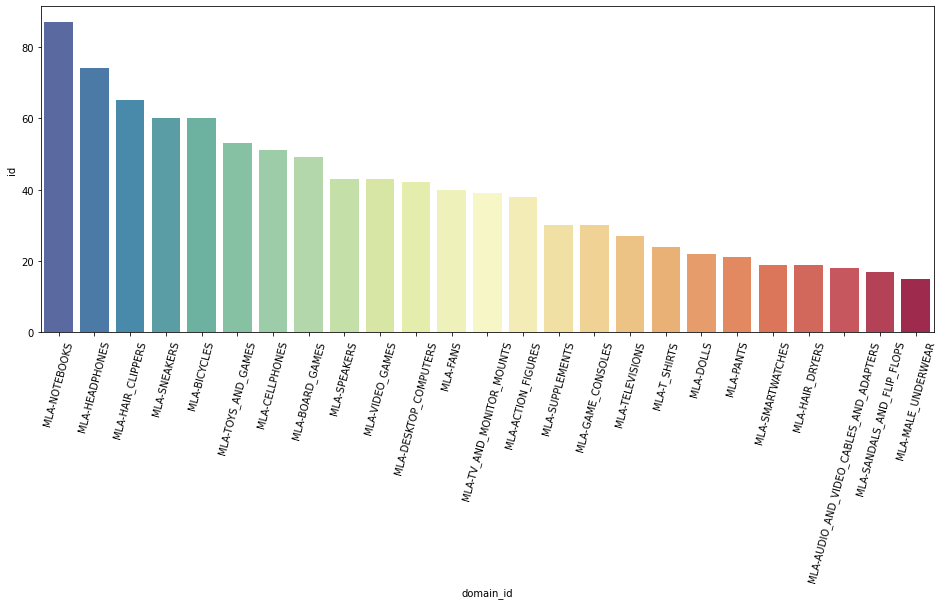

In [11]:
top_categories_df = discount_df.groupby("domain_id").count().sort_values(by=["id"], ascending=False)['id'].iloc[:25].reset_index()


plt.figure(figsize=(16, 6))

bar_plot = sns.barplot(data=top_categories_df, x="domain_id", y="id", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)
    

##### Estos son los valores absolutos para la muestra de ítems con descuento. Entonces, puede seguir la pregunta:
### ¿Estas categorías ofrecen más ítems con descuento porque tienen más ítems en esta categoría, o porque la categoría ofrece más descuentos?
##### Básicamente, lo que se está preguntando es si la distribución de descuentos en la muestra es uniforme o no. 
##### Para responder esta pregunta, vamos a df crudo original. 

In [12]:
# Se toman los mismos 25 domain_ids
top_categories_raw_df = raw_dataset_df[raw_dataset_df["domain_id"].isin(list(top_categories_df["domain_id"].values))]

In [13]:
top_categories_raw_df.groupby("domain_id").count().sort_values(by="id", ascending=False)["id"]

domain_id
MLA-CELLPHONES                             439
MLA-GAME_CONSOLES                          338
MLA-VIDEO_GAMES                            327
MLA-SNEAKERS                               295
MLA-HEADPHONES                             291
MLA-DESKTOP_COMPUTERS                      230
MLA-NOTEBOOKS                              226
MLA-BOARD_GAMES                            178
MLA-SUPPLEMENTS                            168
MLA-T_SHIRTS                               165
MLA-ACTION_FIGURES                         157
MLA-BICYCLES                               156
MLA-HAIR_CLIPPERS                          151
MLA-TELEVISIONS                            145
MLA-PANTS                                  140
MLA-TOYS_AND_GAMES                         122
MLA-FANS                                   108
MLA-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS    101
MLA-SMARTWATCHES                            98
MLA-SPEAKERS                                83
MLA-TV_AND_MONITOR_MOUNTS                   82
MLA

In [14]:
top_categories_raw_df = top_categories_raw_df.groupby("domain_id").count().sort_values(by="id", ascending=False)["id"].reset_index()

##### Hago un join del raw df con el discount df y luego calculo los porcentajes de descuentos ofrecidos en relación al total de publicaciones en esa categoría. 

In [15]:
# Primero renombro las columnas
top_categories_raw_df.columns = ["domain_id", "raw_count"]
top_categories_df.columns = ["domain_id", "discount_count"]

# merge dfs
top_categories_merge_df = top_categories_df.merge(top_categories_raw_df, on=["domain_id"], how="outer")

# Calculo porcentajes
top_categories_merge_df["disc_raw_%"] = top_categories_merge_df.apply(lambda row: round((row["discount_count"] / row["raw_count"]) * 100, 2), axis=1)

In [16]:
top_categories_merge_df.sort_values(by="disc_raw_%", ascending=False)

,domain_id,discount_count,raw_count,disc_raw_%
8,MLA-SPEAKERS,43,83,51.81
12,MLA-TV_AND_MONITOR_MOUNTS,39,82,47.56
21,MLA-HAIR_DRYERS,19,43,44.19
5,MLA-TOYS_AND_GAMES,53,122,43.44
2,MLA-HAIR_CLIPPERS,65,151,43.05
0,MLA-NOTEBOOKS,87,226,38.50
4,MLA-BICYCLES,60,156,38.46
11,MLA-FANS,40,108,37.04
24,MLA-MALE_UNDERWEAR,15,43,34.88
18,MLA-DOLLS,22,66,33.33


##### Las categorías que menos descuentos ofrecen en relación a la cantidad de publicaciones son: Juegos de Video, Celulares y Consolas
##### Parlantes, Mounts para monitores y secadores de pelo son las que más descuentos presentan

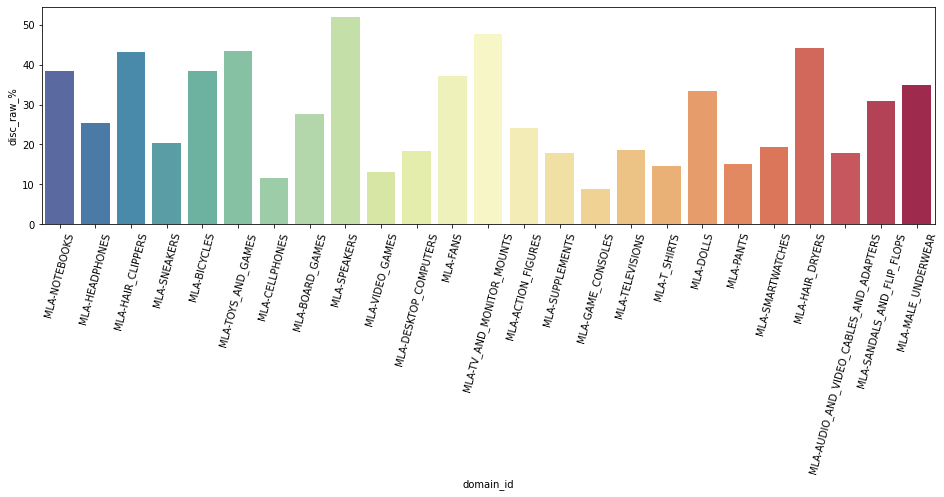

In [17]:
plt.figure(figsize=(16, 4))

bar_plot = sns.barplot(data=top_categories_merge_df, x="domain_id", y="disc_raw_%", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

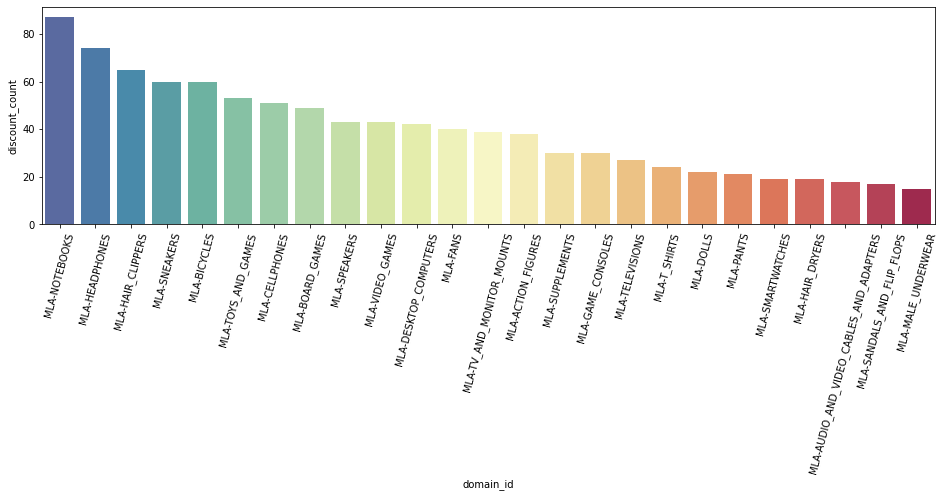

In [18]:
plt.figure(figsize=(16, 4))

bar_plot = sns.barplot(data=top_categories_merge_df, x="domain_id", y="discount_count", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

GRAFICAR EN UN MISMO GRÁFICO CON DOS EJES Y !!!

### Se ve claramente que la distribución de descuentos no es uniforme.
#### Si tomamos, por ejemplo, el caso de los teléfonos celulares, se ve que rankea alto en cantidad de descuentos. Pero cuando vemos el porcentaje de descuentos en celulares en relación a la cantidad de publicaciones en esta categoría, vemos que está en el anteúltimo puesto. 
##### Se podría resumir en: "Hay muchas publicaciones de celulares en el df de descuentos porque hay muchas publicaciones de celulares, no porque haya muchas publicaciones con descuento en la categoría de celulares"

## Hasta acá se tienen las categorías que más publicaciones con descuento ofrecen. ¿Pero son estas categorías las que ofrecen mayores descuentos?

In [19]:
# Busco en el  discount df de las 25 categorías con más publicaciones
price_discount_df = discount_df[discount_df["domain_id"].isin(list(top_categories_df["domain_id"].values))]
price_discount_df = price_discount_df[["id", "domain_id", "price", "original_price"]]

#### Arbitrariamente se decide continuar trabajando con las 25 categorías con más publicaciones con descuento. Esto es, por un lado, para comparar con los resultados obtenidos anteriormente, y por otro lado, para evitar calcular promedios no representativos en categorías que tengan una o dos publicaciones. La categoría con más publicaciones (notebooks) tiene 6 veces más muestras que la categoría con menos publicaciones (male_underwear). Sin embargo, los números están dentro del orden, por lo que se considerará aceptable su comparación. 

In [20]:
price_discount_df

,id,domain_id,price,original_price
2,MLA618887655,MLA-DESKTOP_COMPUTERS,53999.00,74999.0
3,MLA855055612,MLA-NOTEBOOKS,39999.00,46799.0
6,MLA879479401,MLA-NOTEBOOKS,94999.00,112999.0
10,MLA879933423,MLA-NOTEBOOKS,45999.00,64399.0
13,MLA868548326,MLA-NOTEBOOKS,51299.00,79999.0
...,...,...,...,...
10429,MLA682205854,MLA-VIDEO_GAMES,487.66,659.0
10430,MLA674050446,MLA-VIDEO_GAMES,166.38,177.0
10452,MLA822418336,MLA-HEADPHONES,5669.00,6299.0
10461,MLA738235286,MLA-VIDEO_GAMES,4199.00,5199.0


### Primero se calculará un promedio global en los descuentos, respondiendo a la pregunta "¿Cuál es el descuento promedio en el marketplace?" y luego se calculará el promedio dentro de cada categoría, respondiendo a la pregunta "¿Qué categoría ofrece, en promedio, los mayores descuentos?"

##### También, aunque no se entrará en detalle, se hará un poco de estadística descriptiva sobre los precios de las categorías. Hay que tener en cuenta que no es lo mismo un descuento del 20% en ARS 200, que en ARS 200.000

In [21]:
# Creo las columnas que voy a necesitar:
price_discount_df["discount_$"] = price_discount_df.apply(lambda row: row["original_price"] - row["price"], axis=1)
price_discount_df["discount_%"] = price_discount_df.apply(lambda row: round((row["discount_$"] / row["original_price"]) * 100),
                                                          axis=1)

In [22]:
# Estadística descriptiva
price_discount_df.describe()

,price,original_price,discount_$,discount_%
count,986.000000,986.000000,986.000000,986.000000
mean,17584.641592,22747.846105,5163.204513,17.859026
std,28825.975116,38445.206286,10820.342059,11.275570
min,111.770000,118.900000,7.130000,3.000000
25%,1619.787500,1990.000000,202.500000,8.000000
50%,3394.500000,4274.500000,641.250000,15.000000
75%,22897.815000,25999.000000,3000.000000,25.000000
max,199975.000000,299999.000000,100024.000000,78.000000


INCLUIR GRÁFICO (box and whiskers o distribución que muestre el skew)

### Análisis de resultados:
#### Los resultados muestran que, dentro del promedio, se están pesando cosas que no necesariamente son comparables. En cuando al porcentaje promedio de descuento en nuestra muestra del marketplace, el valor está en 17.85 unidades*. Sin embargo, con un desvío estandar de 11 unidades, de poco nos sirve este promedio. Si asumiéramos que la distribución es normal (que no lo es), y quisiéramos proporcionar un intervalo de 95% de confianza para este promedio, estaríamos en un rango de aproximadamente entre -4.5 y 44.2 unidades. A esto se llega tomando un intervalo de 2 desvíos estándar a partir de la media (válido únicamente para la distribución normal).
#### ¿Qué tan lejos está esta distribución de ser una distribución normal?
#### Puede que no esté tan lejos. Para empezar, lo obvio: la mediana es distinta de la media. Sin embargo, no son tan distintas (15 vs 17.85). El valor máximo podría indicar un skew hacia la derecha, pero viendo los intervalos entre los percentiles, tranquilamente este valor podría ser un outlier. Entre la mediana y el 25% hay 7 unidades de diferencia, y con respecto al 75% hay 10 unidades de diferencia. Esto nos habla de una distribución con un skew hacia la derecha (positiva) no demasiado pronunciado. 

##### *NOTA: uso la palabra "unidades" tomando los valores como si fueran adimensionales para no confundir. Siendo que el resultado es un porcentaje, se presta para la confusión. Puede estarse hablando del punto porcentual como unidad, o del punto porcentual en relación al valor obtenido. 

#### En cuanto a los precios, los promedios nos dan menos información aún. En todos los casos el desvío estándar tiene un valor de aproximadamente el doble de la media

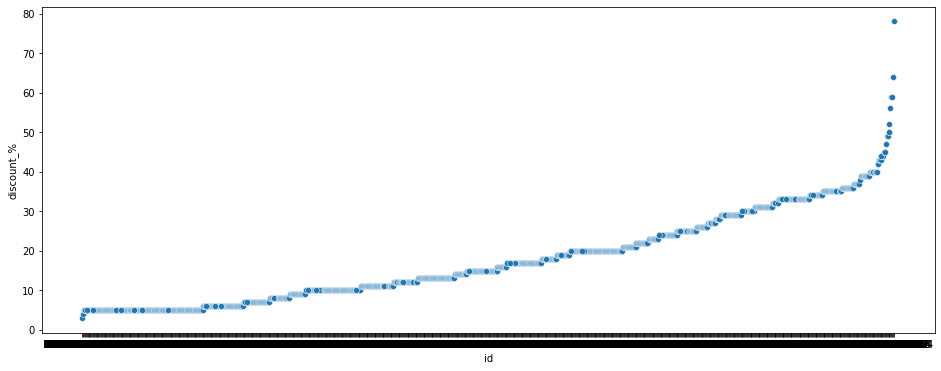

In [23]:
# Grafico de % de descuento por ítem. 
plt.figure(figsize=(16, 6))

scatter_plot = sns.scatterplot(data=price_discount_df.sort_values(by="discount_%", ascending=True), 
                           x="id", y="discount_%")

# Eliminar xticklabels

#### En el gráfico vemos que los descuentos por encima del 50% son outliers en nuestro dataset

### Análisis de descuentos por categoría. 

In [24]:
for category in set(price_discount_df["domain_id"].values):
    print(category)
    print(price_discount_df[price_discount_df["domain_id"] == category].describe())
    print("\n")

MLA-SUPPLEMENTS
             price  original_price   discount_$  discount_%
count    30.000000       30.000000    30.000000   30.000000
mean   1701.312667     2190.733333   489.420667   22.266667
std    1114.587884     1386.028584   355.978256    8.669937
min     429.000000      550.000000    27.500000    5.000000
25%     865.675000     1199.500000   250.000000   20.000000
50%    1373.000000     1800.500000   464.205000   24.500000
75%    2367.000000     2703.750000   578.847500   25.750000
max    4275.000000     5290.000000  1323.000000   36.000000


MLA-TELEVISIONS
              price  original_price    discount_$  discount_%
count     27.000000       27.000000     27.000000   27.000000
mean   42842.075926    51692.000000   8849.924074   15.518519
std    12433.099764    18375.068433   7871.902284    8.527649
min    24999.000000    29999.000000   1750.000000    5.000000
25%    32619.500000    37589.500000   3000.000000    7.000000
50%    43998.000000    48999.000000   5991.000000   17

               price  original_price    discount_$  discount_%
count      42.000000       42.000000     42.000000   42.000000
mean    52754.803571    70548.570238  17793.766667   24.238095
std     24796.795633    32653.866748  11027.807147   12.274919
min     23360.500000    24590.000000   1229.500000    5.000000
25%     33999.000000    49999.000000   8736.375000   15.750000
50%     47499.000000    63163.920000  19000.000000   27.000000
75%     63749.000000    79999.000000  25000.000000   33.000000
max    122999.000000   149999.000000  40000.000000   44.000000


MLA-ACTION_FIGURES
             price  original_price   discount_$  discount_%
count    38.000000       38.000000    38.000000   38.000000
mean   2005.901842     2321.447368   315.545526   12.368421
std    1355.619976     1501.658861   434.673892   11.485410
min     197.100000      219.000000    21.900000    5.000000
25%    1151.067500     1374.250000    99.950000    5.000000
50%    1873.585000     2048.500000   165.915000    9

In [25]:
# Seguramente haya una forma más elegante de hacer esto...

mean_df = price_discount_df[["domain_id", "discount_%"]].groupby("domain_id").mean()
median_df = price_discount_df[["domain_id", "discount_%"]].groupby("domain_id").median()
std_df = price_discount_df[["domain_id", "discount_%"]].groupby("domain_id").std()
q25_df = price_discount_df[["domain_id", "discount_%"]].groupby("domain_id").quantile(q=0.25)
q75_df = price_discount_df[["domain_id", "discount_%"]].groupby("domain_id").quantile(q=0.75)

agg_df = mean_df
agg_df.columns = ["mean"]
agg_df["q25"] = q25_df["discount_%"]
agg_df["median"] = median_df["discount_%"]
agg_df["q75"] = q75_df["discount_%"]
agg_df["std_err"] = std_df["discount_%"]

agg_df.reset_index(inplace=True)

agg_df

,domain_id,mean,q25,median,q75,std_err
0,MLA-ACTION_FIGURES,12.368421,5.00,9.5,13.00,11.485410
1,MLA-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS,11.055556,6.00,6.0,17.50,7.471296
2,MLA-BICYCLES,22.483333,10.00,29.0,33.00,11.368245
3,MLA-BOARD_GAMES,13.918367,10.00,13.0,17.00,7.102924
4,MLA-CELLPHONES,16.549020,9.50,14.0,21.50,8.431640
5,MLA-DESKTOP_COMPUTERS,24.238095,15.75,27.0,33.00,12.274919
6,MLA-DOLLS,15.272727,7.75,12.5,17.00,10.180195
7,MLA-FANS,14.800000,7.00,13.0,22.25,7.789539
8,MLA-GAME_CONSOLES,13.433333,5.00,11.0,19.25,8.900536
9,MLA-HAIR_CLIPPERS,23.984615,17.00,24.0,30.00,11.673277


Graficar ditribución en función de media, mediana y std_err

#### En la mayoría de las categorías se ve un patrón similar: la mediana adelantando levemente a la media, indicando una distribución con un skew levemente positivo. Esto tiene sentido, es de esperar que la mayoría de los descuentos tiendan a ser más pequeños. Es decir, que la densidad de la distribución sea mayor hacia los valores de descuento más pequeños y que la probabilidad decaiga a medida que los descuentos se hacen más grandes. Hay algunas excepciones, como el rubro de bicicletas, por ejemplo, o el de computadoras desktop. 
#### Los desvíos estándar de las muestras están entre un 0.5 y un 0.8 de los promedios correspondientes. Esto da cuenta de la variabilidad entre los valores de la muestra (los valores dentro de una misma categoría se encuentran muy alejados). Esto no es ideal, pero es lo que tenemos para trabjar, por lo que vamos a considerarlo un error aceptable. 

### Comparación entre categorías con más descuentos y categorías con mayores descuentos

In [26]:
# Ordeno el domain_id para poder graficar y comparar.
sort_list = top_categories_merge_df.sort_values(by="disc_raw_%", ascending=False)["domain_id"].values.tolist()
domain_id_order = pd.api.types.CategoricalDtype(sort_list, ordered=True)
agg_df["domain_id"] = agg_df["domain_id"].astype(domain_id_order)

agg_df.sort_values(by="domain_id", ascending=True, inplace=True)

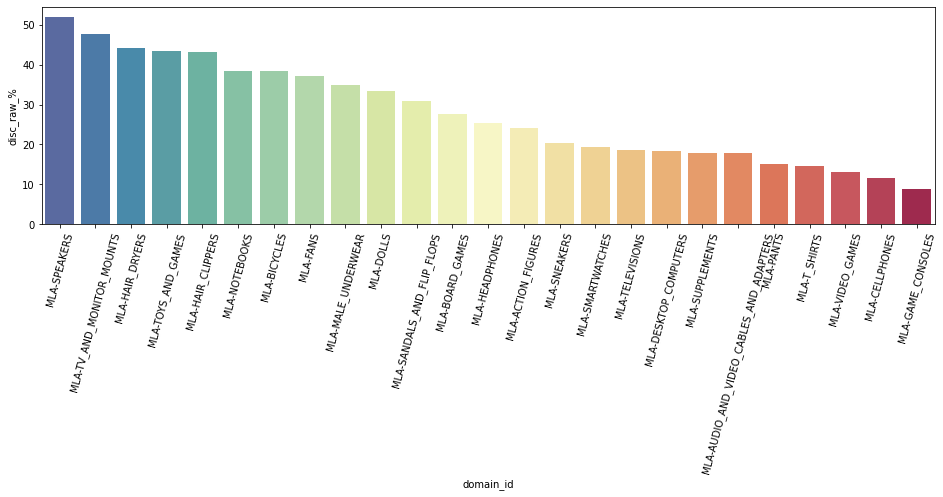

In [27]:
plt.figure(figsize=(16, 4))

bar_plot = sns.barplot(data=top_categories_merge_df.sort_values(by="disc_raw_%", ascending=False), 
                       x="domain_id", y="disc_raw_%", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

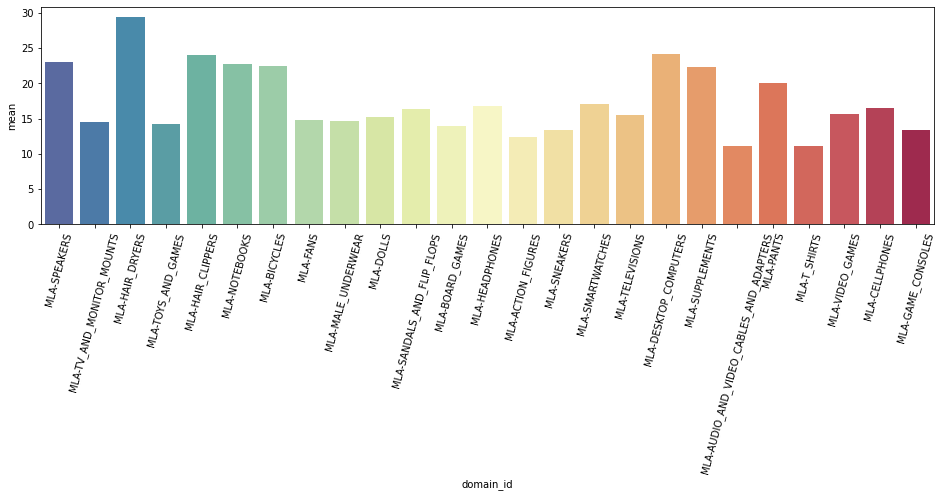

In [28]:
plt.figure(figsize=(16, 4))

bar_plot = sns.barplot(data=agg_df, x="domain_id", y="mean", palette="Spectral_r")

for cat_label in bar_plot.get_xticklabels():
    cat_label.set_rotation(75)

Intentar graficar ambos en un mismo gráfico (valga la redundancia)

### Si bien ya se mencionó que, con los valores de desvío estándar obtenidos no se puede confiar mucho en los promedios obtenidos, la comparación sigue siendo válida. Se ve que la categoría que más descuentos ofrece no es necesariamente la que mejor descuentos ofrece. También se ve que la distribución de promedios de descuento es más uniforme que la distribución de cantidad de descuentos (de nuevo, si no se toma en cuenta el desvío estándar). 

#### Este análisis es interesante si uno se pone del lado del comprador. 
#### Por ejemplo, en el rubro de computadoras desktop, se ve que hay pocos descuentos (en relación a la cantidad de publicaciones), pero el descuento promedio (de las publicaciones con descuento) es alto. Entonces, desde el lado del consumidor, ver una computadora desktop con un buen descuento puede ser percibido como una oportunidad "aprovecho este buen descuento porque hay pocos"
#### El caso contrario es el de mounts para televisores y monitores. Este rubro no tiene los mejores descuentos, pero son abundantes. Desde el punto de vista del consumidor, se puede percibir como que "los mounts están baratos, aprovecho ahora a comprar con descuento"

#### El punto que quiero ilustrar es que en el primer caso el razonamiento es "necesito un producto, cuando vea un buen descuento lo aprovecho porque sé que hay pocos". Mientras que en el segundo el razonamiento es "No necesariamente necesito el producto ahora, pero aprovecho que bajaron de precio porque probablemente lo necesite en el futuro"

## La sigiuente pregunta es: ¿Afectan los descuentos a la venta de los items?

#### Resultaría interesante ver, para una misma categoría, si los artículos con descuento se venden más que los que no tienen descuento. (también hay que tener en cuenta la cantidad de publicaciones con descuento...)

In [29]:
# Tomo el raw df y filtro por las mismas 25 categorías. 
# Esto ya lo hice antes... podría haber reciclado el df, pero usé el mismo nombre para el df agregado.
raw_top_categories_df = raw_dataset_df[raw_dataset_df["domain_id"].isin(top_categories_df["domain_id"].values.tolist())]

In [30]:
price_top_categories_df = raw_top_categories_df[["id", "domain_id","price", "original_price", "sold_quantity"]]

In [31]:
price_top_categories_df

,id,domain_id,price,original_price,sold_quantity
2,MLA618887655,MLA-DESKTOP_COMPUTERS,53999.00,74999.0,500
3,MLA855055612,MLA-NOTEBOOKS,39999.00,46799.0,5000
5,MLA861922903,MLA-DESKTOP_COMPUTERS,22167.29,NaN,150
6,MLA879479401,MLA-NOTEBOOKS,94999.00,112999.0,5
8,MLA818224563,MLA-DESKTOP_COMPUTERS,63999.00,NaN,500
...,...,...,...,...,...
10471,MLA822088384,MLA-VIDEO_GAMES,248.25,NaN,50
10476,MLA685058445,MLA-VIDEO_GAMES,183.21,197.0,150
10478,MLA678679714,MLA-HEADPHONES,2249.00,NaN,500
10479,MLA858821035,MLA-VIDEO_GAMES,2999.00,NaN,100


#### Igual que antes, se separa en dos dfs para calcular promedios

In [32]:
disc_top_categories_df = price_top_categories_df[price_top_categories_df["original_price"].notnull()]
full_top_categories_df = price_top_categories_df[price_top_categories_df["original_price"].isnull()]
# Agrego una columna extra que me va a servir más adelante
#disc_top_categories_df["discount"] = True
#full_top_categories_df["discount"] = False

In [33]:
mean_disc_df = disc_top_categories_df.groupby("domain_id").mean().reset_index()
mean_full_df = full_top_categories_df.groupby("domain_id").mean().reset_index()

std_disc_df = disc_top_categories_df.groupby("domain_id").std().reset_index()
std_full_df = full_top_categories_df.groupby("domain_id").std().reset_index()

ms_disc_df = mean_disc_df.merge(std_disc_df, on=["domain_id"])[["domain_id","sold_quantity_x", "sold_quantity_y"]]
ms_full_df = mean_full_df.merge(std_full_df, on=["domain_id"])[["domain_id","sold_quantity_x", "sold_quantity_y"]]
ms_disc_df.columns =["domain_id", "mean", "std"]
ms_full_df.columns =["domain_id", "mean", "std"]
# Agrego una columna extra que me va a servir más adelante para graficar
ms_disc_df["discount"] = True
ms_full_df["discount"] = False

In [34]:
# Uno los dfs para graficarlos juntos
appended_df = ms_disc_df.append(ms_full_df, ignore_index=True)
appended_df

,domain_id,mean,std,discount
0,MLA-ACTION_FIGURES,250.000000,166.441289,True
1,MLA-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS,422.222222,130.859402,True
2,MLA-BICYCLES,148.916667,175.289329,True
3,MLA-BOARD_GAMES,304.081633,170.121505,True
4,MLA-CELLPHONES,123.764706,263.010083,True
5,MLA-DESKTOP_COMPUTERS,194.761905,197.977433,True
6,MLA-DOLLS,334.090909,174.837587,True
7,MLA-FANS,343.750000,147.277646,True
8,MLA-GAME_CONSOLES,150.633333,179.040447,True
9,MLA-HAIR_CLIPPERS,1112.307692,1676.119746,True


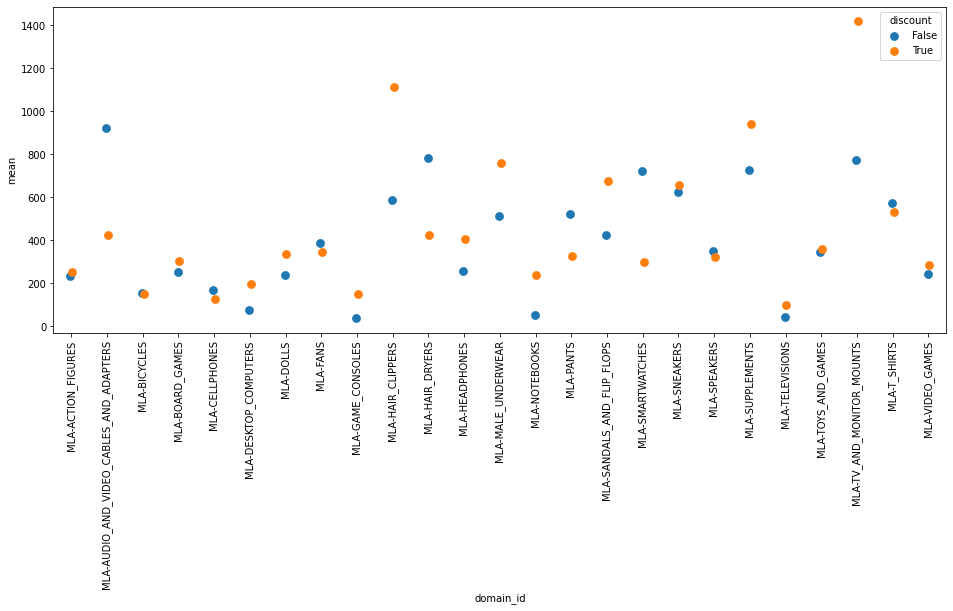

In [35]:
# Gráfico sin barras de error

plt.figure(figsize=(16, 6))

point_plot = sns.pointplot(x = 'domain_id', y = 'mean', hue='discount',
                           data=appended_df, dodge=True, join=False, ci=None,
                           )

for cat_label in point_plot.get_xticklabels():
    cat_label.set_rotation(90)

<ErrorbarContainer object of 3 artists>

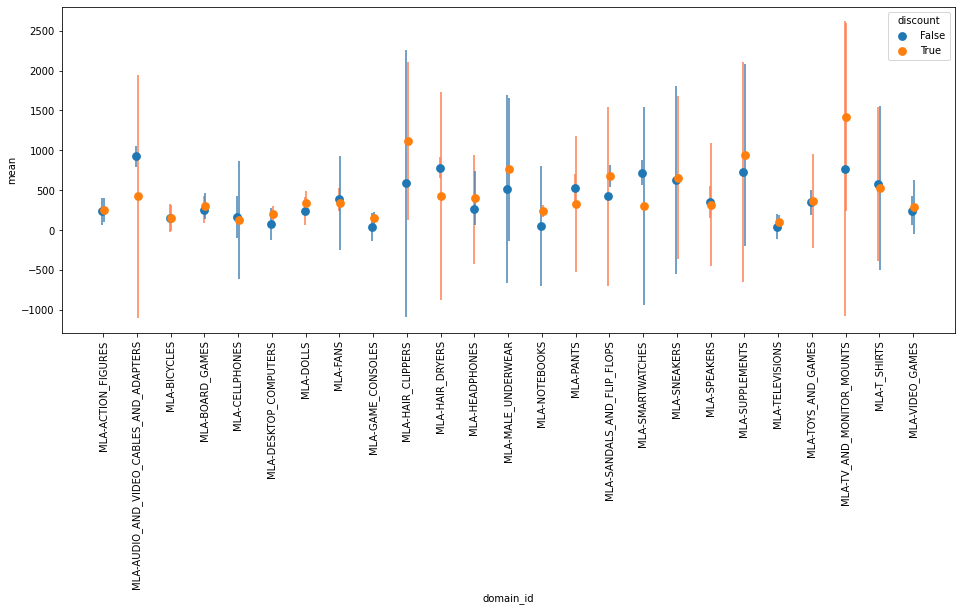

In [36]:
# A ver cómo cambia cuando agregamos los intervalos de confianza:

plt.figure(figsize=(16, 6))

point_plot = sns.pointplot(x = 'domain_id', y = 'mean', hue='discount',
                           data=appended_df, dodge=True, join=False, ci=None,
                           )

for cat_label in point_plot.get_xticklabels():
    cat_label.set_rotation(90)
    
# Find the x,y coordinates for each point
x_coords = []
y_coords = []
for point_pair in point_plot.collections:
    for x, y in point_pair.get_offsets():
        x_coords.append(x)
        y_coords.append(y)

# Calculate the type of error to plot as the error bars
# Make sure the order is the same as the points were looped over
errors = appended_df["std"]
colors = ['steelblue']*2 + ['coral']*2
point_plot.errorbar(x_coords, y_coords, yerr=errors,
                    ecolor=colors, fmt=' ', zorder=-1)

### En base a la muestra, no se puede concluir que, en promedio, los artículos con descuento se vendan más que los artículos sin descuento. Como se ve, los intervalos de confianza para cada valor se solapan (además, hay que tener en cuenta que se definió un intervalo de confianza de un solo desvío estándar).

##### Siendo que estoy comparando promedios, la idea era hacer un test de hipótesis para algunas categorías (las que más se acerquen a una distribución normal) para evaluar si se podía concluir que los promedios eran distintos. Sin embargo, viendo el gráfico, esto pierde un poco de sentido. 

### HACER TEST DE HIPÓTESIS SI DA EL TIEMPO

### Por último, otra pregunta que vale la pena hacerse es si aumenta la cantidad de ventas a mayor descuento

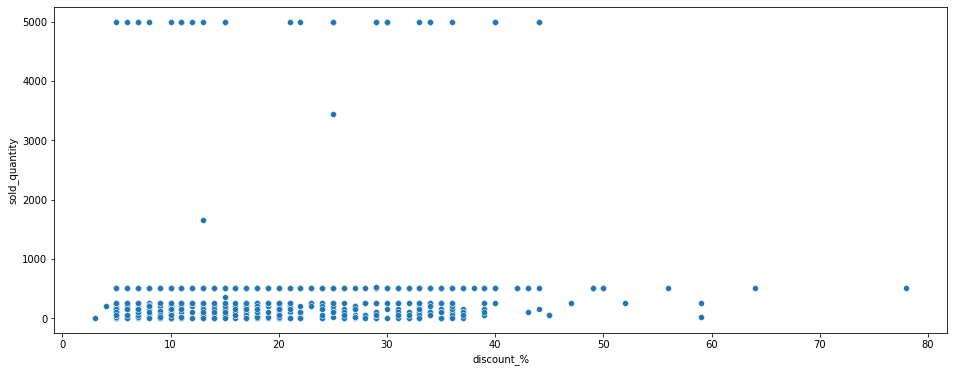

In [37]:
# Para responderla, se grafica sold_quantity en función de discount_%
data = price_discount_df.merge(raw_dataset_df[["id", "sold_quantity"]], on=["id"])

plt.figure(figsize=(16, 6))

scatter_plot = sns.scatterplot(data=data, x = "discount_%", y="sold_quantity")

#### A priori, no parecería que no. Parece que no hay relación entre mayores descuentos y mayores ventas.

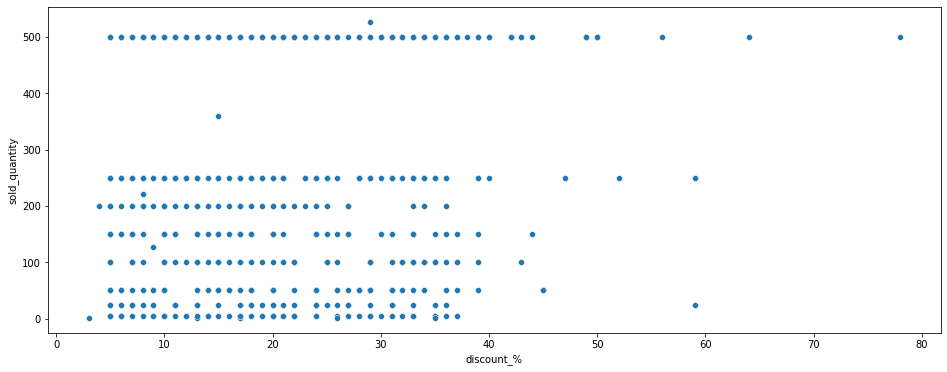

In [38]:
data = price_discount_df.merge(raw_dataset_df[["id", "sold_quantity"]], on=["id"])

plt.figure(figsize=(16, 6))

scatter_plot = sns.scatterplot(data=data[data["sold_quantity"] < 1000], x = "discount_%", y="sold_quantity")

#### Si nos concentramos en los items con menor cantidad de ventas, vemos que la tendencia se mantiene. No parecería haber relación entre los descuentos y la cantidad de ventas. 

# Parte 2: Modelo

In [39]:
raw_dataset_df.corr().loc["sold_quantity"]

price                                                                        -0.092391
available_quantity                                                            0.090471
sold_quantity                                                                 1.000000
original_price                                                               -0.084297
official_store_id                                                             0.086667
seller.id                                                                    -0.034141
seller.eshop.eshop_status_id                                                 -0.022755
seller.seller_reputation.transactions.total                                   0.053850
seller.seller_reputation.transactions.canceled                                0.042290
seller.seller_reputation.transactions.ratings.negative                       -0.019782
seller.seller_reputation.transactions.ratings.positive                        0.024815
seller.seller_reputation.transactions.ratin



### Por razones de tiempo, se eligen arbitrariamente un subset de columnas

In [40]:
# Selección arbitraria de campos
reduced_df = raw_dataset_df[["id", "title", "price", "sold_quantity", "listing_type_id", "original_price", "domain_id",
                            "tags", "seller.id", "seller.seller_reputation.transactions.total", "seller.seller_reputation.transactions.ratings.positive",
                            "seller.seller_reputation.transactions.ratings.negative", "seller.seller_reputation.power_seller_status",
                            "seller.seller_reputation.metrics.delayed_handling_time.rate", "address.state_name", "address.city_name", 
                            "shipping.free_shipping"]]

### Análisis de correlación de las variables numéricas. 

In [41]:
reduced_df.corr().loc["sold_quantity"]

price                                                         -0.092391
sold_quantity                                                  1.000000
original_price                                                -0.084297
seller.id                                                     -0.034141
seller.seller_reputation.transactions.total                    0.053850
seller.seller_reputation.transactions.ratings.positive         0.024815
seller.seller_reputation.transactions.ratings.negative        -0.019782
seller.seller_reputation.metrics.delayed_handling_time.rate   -0.012220
shipping.free_shipping                                        -0.097480
Name: sold_quantity, dtype: float64

### A priori, parece que las variables numéricas no nos dan mucho poder de predicción. 
### Análisis de variables categóricas. 

In [42]:
cat_var_df = reduced_df[["sold_quantity","listing_type_id", "domain_id", "seller.seller_reputation.power_seller_status", "address.state_name", "shipping.free_shipping"]]

cat_var_df

,sold_quantity,listing_type_id,domain_id,seller.seller_reputation.power_seller_status,address.state_name,shipping.free_shipping
0,3179,gold_special,MLA-ROUTERS_AND_WIRELESS_SYSTEMS,platinum,Capital Federal,False
1,5858,gold_special,MLA-HARD_DRIVES_AND_SSDS,platinum,Capital Federal,True
2,500,gold_pro,MLA-DESKTOP_COMPUTERS,platinum,Capital Federal,True
3,5000,gold_pro,MLA-NOTEBOOKS,platinum,Capital Federal,True
4,500,gold_special,MLA-DESKTOP_COMPUTER_COOLERS_AND_FANS,platinum,Capital Federal,False
...,...,...,...,...,...,...
10478,500,gold_special,MLA-HEADPHONES,platinum,Capital Federal,True
10479,100,gold_pro,MLA-VIDEO_GAMES,platinum,Capital Federal,True
10480,100,gold_special,MLA-VIDEO_GAMES,platinum,Entre Ríos,False
10481,100,gold_special,MLA-VIDEO_GAME_CONTROLLER_CHARGERS,platinum,Capital Federal,False


## La verdad es que sería mucho más prolijo hacer los gráficos todos juntos. Pero me falta práctica con Seaborn, por lo que los voy a hacer separados.

<AxesSubplot:xlabel='listing_type_id', ylabel='sold_quantity'>

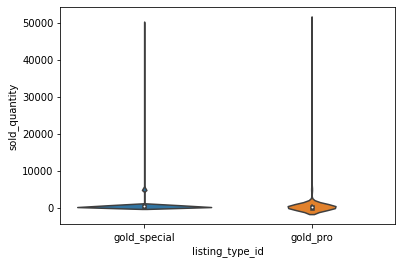

In [43]:
sns.violinplot(x=cat_var_df.listing_type_id, y=cat_var_df.sold_quantity)

<AxesSubplot:xlabel='seller.seller_reputation.power_seller_status', ylabel='sold_quantity'>

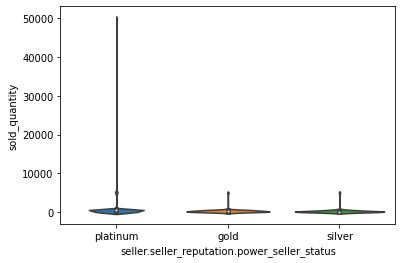

In [44]:
sns.violinplot(x="seller.seller_reputation.power_seller_status", y="sold_quantity", data=cat_var_df)

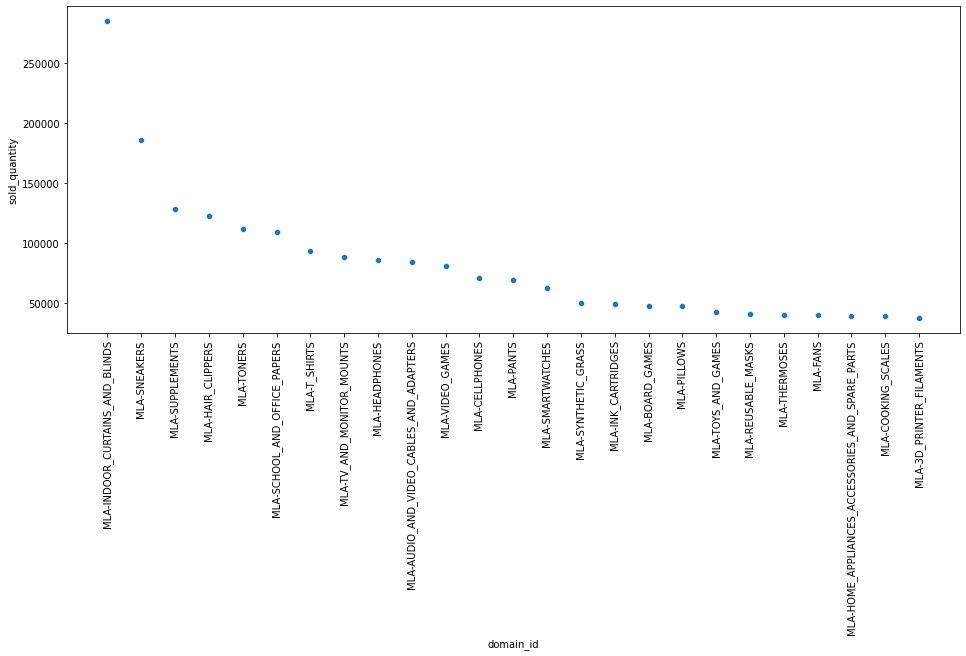

In [45]:
plt.figure(figsize=(16,6))

domain_df = cat_var_df.groupby("domain_id").sum().reset_index().sort_values(by="sold_quantity", ascending=False).iloc[:25]
scat_plot = sns.scatterplot(x="domain_id", y="sold_quantity", data=domain_df)

for cat in scat_plot.get_xticklabels():
    cat.set_rotation(90)


In [46]:
total_sales = cat_var_df["sold_quantity"].sum()
domain_df["sold_qty_%"] = domain_df["sold_quantity"].apply(lambda x: round((x / total_sales) * 100, 2))

domain_df

,domain_id,sold_quantity,shipping.free_shipping,sold_qty_%
455,MLA-INDOOR_CURTAINS_AND_BLINDS,285000,2,5.34
727,MLA-SNEAKERS,186150,165,3.49
781,MLA-SUPPLEMENTS,128450,69,2.41
404,MLA-HAIR_CLIPPERS,122550,97,2.30
828,MLA-TONERS,111500,6,2.09
697,MLA-SCHOOL_AND_OFFICE_PAPERS,109400,18,2.05
873,MLA-T_SHIRTS,93450,21,1.75
867,MLA-TV_AND_MONITOR_MOUNTS,88400,22,1.66
429,MLA-HEADPHONES,85787,175,1.61
28,MLA-AUDIO_AND_VIDEO_CABLES_AND_ADAPTERS,84225,7,1.58


##### Bueno... es débil... pero hay una tendencia... 

In [47]:
cat_var_df.sort_values(by="sold_quantity", ascending = False)

,sold_quantity,listing_type_id,domain_id,seller.seller_reputation.power_seller_status,address.state_name,shipping.free_shipping
9289,50000,gold_pro,MLA-INDOOR_CURTAINS_AND_BLINDS,platinum,Capital Federal,False
9304,50000,gold_pro,MLA-INDOOR_CURTAINS_AND_BLINDS,platinum,Capital Federal,False
8614,50000,gold_special,MLA-SYNTHETIC_GRASS,platinum,Capital Federal,False
9308,50000,gold_pro,MLA-INDOOR_CURTAINS_AND_BLINDS,platinum,Capital Federal,False
9295,50000,gold_pro,MLA-INDOOR_CURTAINS_AND_BLINDS,platinum,Buenos Aires,False
...,...,...,...,...,...,...
5284,0,gold_special,MLA-CELLPHONES,NaN,Capital Federal,True
9906,0,gold_special,MLA-GAME_CONSOLES,silver,Buenos Aires,True
5285,0,gold_special,MLA-CELLPHONES,NaN,Buenos Aires,True
5302,0,gold_pro,MLA-CELLPHONES,NaN,La Pampa,True


## Siendo el sold_quantity una variable discreta, puede que me esté complicando el análisis. 
#### https://developers.mercadolibre.com.ar/es_ar/items-y-busquedas#Valores-en-campos-sold-quantity-y-available-quantity

<AxesSubplot:xlabel='listing_type_id', ylabel='sold_quantity'>

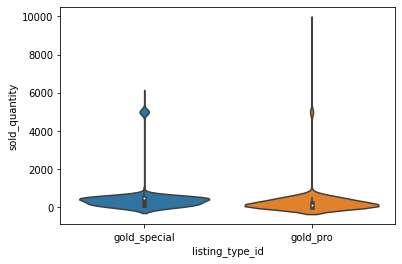

In [48]:
sns.violinplot(x="listing_type_id", y="sold_quantity", data=cat_var_df[cat_var_df["sold_quantity"] < 20000])

<AxesSubplot:xlabel='seller.seller_reputation.power_seller_status', ylabel='sold_quantity'>

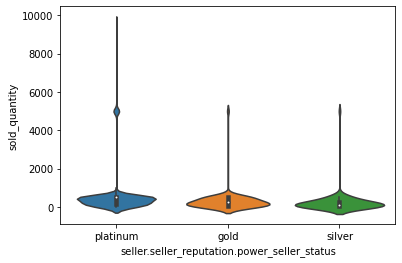

In [49]:
sns.violinplot(x="seller.seller_reputation.power_seller_status", y="sold_quantity", data=cat_var_df[cat_var_df["sold_quantity"] < 20000])

### De nuevo, la tendencia es leve. Pero se ve que la distribución de los vendedores platinum está más "hacia arriba" que la de los silver. (también se ve en el punto que marca el promedio).
### Lo mismo ocurre con las publicaciones gold_special en el gráfico anterior. 

#### Si "hacemos zoom"

<AxesSubplot:xlabel='seller.seller_reputation.power_seller_status', ylabel='sold_quantity'>

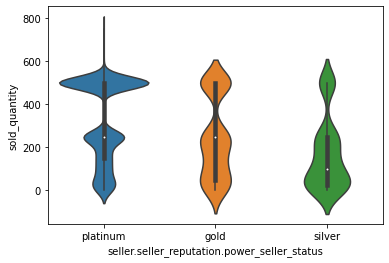

In [50]:
sns.violinplot(x="seller.seller_reputation.power_seller_status", y="sold_quantity", data=cat_var_df[cat_var_df["sold_quantity"] < 1000])

### De nuevo, se ve una tendencia. Se ve la diferencia entre los vendedores platinum y silver.  

## ¿Vale la pena trabjar con TODO el dataset? ¿Los valores por encima de 1000 aportan información o son outliers?

In [51]:
print(len(cat_var_df[cat_var_df["sold_quantity"] < 1000]))
print(len(cat_var_df[cat_var_df["sold_quantity"] < 3000]))
print(len(cat_var_df[cat_var_df["sold_quantity"] < 6000]))
print(len(cat_var_df[cat_var_df["sold_quantity"] < 10000]))

10088
10092
10476
10477


In [52]:
print(len(cat_var_df[cat_var_df["sold_quantity"] < 501]))
print(len(cat_var_df[cat_var_df["sold_quantity"] < 500]))

10080
5501


In [53]:
cat_var_df.groupby("sold_quantity").count().reset_index().iloc[:,:2].sort_values(by="sold_quantity", ascending=False).iloc[:40]

,sold_quantity,listing_type_id
71,50000,6
70,9649,1
69,5858,1
68,5057,1
67,5000,376
66,4932,1
65,4569,1
64,4148,1
63,4044,1
62,3439,1


## Decisción arbitraria para facilitar el análisis:
### Voy a tomar únicamente los registros que tengan un valor sold_quantity menor a 501. Me queda un dataset de 10.000 registros, y las tendencias se ven mejor en los gráficos. No me gusta perder los 376 registros de 5000 ventas, pero pienso que va a ser para mejor.  Va a ser más lo que se gana en términos de modelado que la información que se pierde por esos registros. 


In [54]:
len_full_dataset = len(cat_var_df)
len_500_dataset = len(cat_var_df[cat_var_df["sold_quantity"] < 501])

print("Cantidad de registros que caen por encima de las 500 ventas:")
print(round(((len_full_dataset - len_500_dataset) / len_full_dataset)*100, 2), "%")

Cantidad de registros que caen por encima de las 500 ventas:
3.84 %


#### Sacrifico precisión en ese 3.84% de los registros... 

### Repito el análisis con el nuevo df

In [55]:
raw_dataset_df = raw_dataset_df[raw_dataset_df["sold_quantity"] < 501]

In [56]:
# Analisis de variables numéricas
raw_dataset_df.corr()["sold_quantity"]

price                                                                        -0.398759
available_quantity                                                            0.043766
sold_quantity                                                                 1.000000
original_price                                                               -0.398084
official_store_id                                                             0.137452
seller.id                                                                    -0.075357
seller.eshop.eshop_status_id                                                 -0.052181
seller.seller_reputation.transactions.total                                   0.143524
seller.seller_reputation.transactions.canceled                                0.104722
seller.seller_reputation.transactions.ratings.negative                       -0.058957
seller.seller_reputation.transactions.ratings.positive                        0.068143
seller.seller_reputation.transactions.ratin

### Ahora, trabajando en este rango, las variables muestran mucha más correlación. 

In [57]:
#redefino el reduced df a partir de los valores obtenidos. 
red_df_cols = ["id", "sold_quantity", "price", "shipping.free_shipping", "seller.seller_reputation.metrics.claims.excluded.real_rate",
              "seller.seller_reputation.transactions.completed", "seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value",
              "seller.seller_reputation.metrics.cancellations.excluded.real_rate"] 

#### Se decidió dejar afuera algunos campos con alta correlación simplemente por no saber bién qué son. Prefiero no meter datos sin saber qué son. 

### Análisis de variables categóricas
##### Voy a repetir los gráficos anteriores

In [58]:
cat_var_df = raw_dataset_df[["sold_quantity","listing_type_id", "domain_id", "seller.seller_reputation.power_seller_status", "address.state_name", "shipping.free_shipping"]]

<AxesSubplot:xlabel='listing_type_id', ylabel='sold_quantity'>

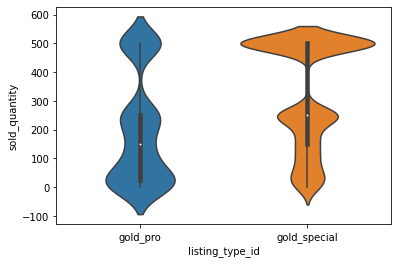

In [59]:
sns.violinplot(x="listing_type_id", y="sold_quantity", data=cat_var_df)

##### Se ve que las publicaciones gold_special, en general, tienen más ventas que las publicaciones gold_pro

<AxesSubplot:xlabel='seller.seller_reputation.power_seller_status', ylabel='sold_quantity'>

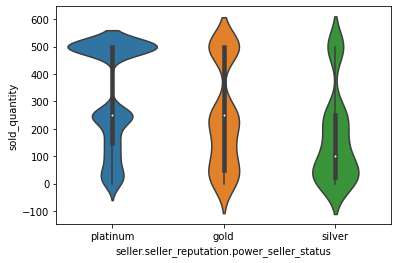

In [60]:
sns.violinplot(x="seller.seller_reputation.power_seller_status", y="sold_quantity", data=cat_var_df)

##### Se ve claramente la progresión desde el status silver hasta el platinum

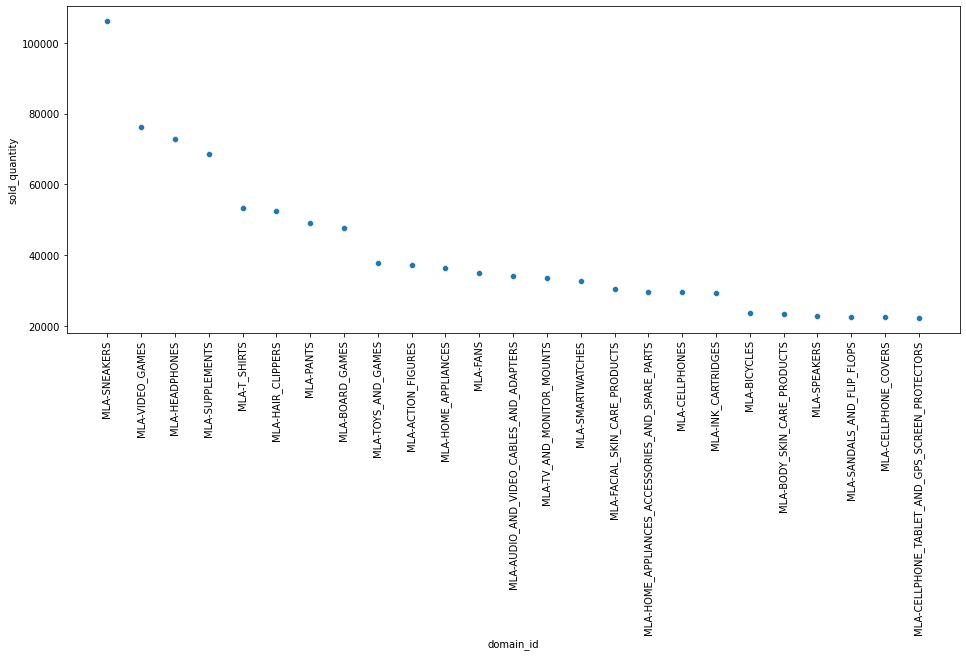

In [61]:
 plt.figure(figsize=(16,6))

domain_df = cat_var_df.groupby("domain_id").sum().reset_index().sort_values(by="sold_quantity", ascending=False).iloc[:25]
scat_plot = sns.scatterplot(x="domain_id", y="sold_quantity", data=domain_df)

for cat in scat_plot.get_xticklabels():
    cat.set_rotation(90)

##### Se ve una tendencia leve. Si bien se ve que se venden muchas zapatillas, la separación de categorías es demasiado granular como para ser un buen predictor. 

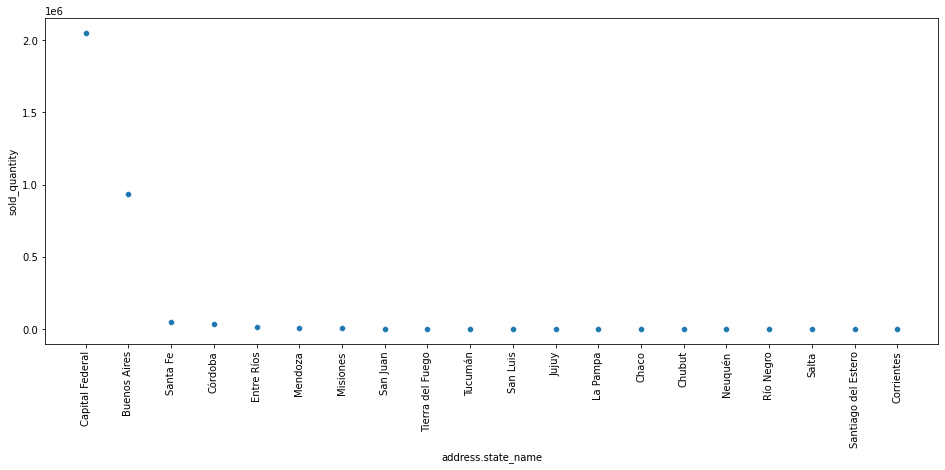

In [62]:
 plt.figure(figsize=(16,6))

domain_df = cat_var_df.groupby("address.state_name").sum().reset_index().sort_values(by="sold_quantity", ascending=False).iloc[:25]
scat_plot = sns.scatterplot(x="address.state_name", y="sold_quantity", data=domain_df)

for cat in scat_plot.get_xticklabels():
    cat.set_rotation(90)

##### Para la mayoría de los ítems vendidos, el vendedor tiene domicilio en Capital Federal. 
#### Como Capital Federal y Buenos Aires se van de escala, se analiza el gráfico sin su presencia

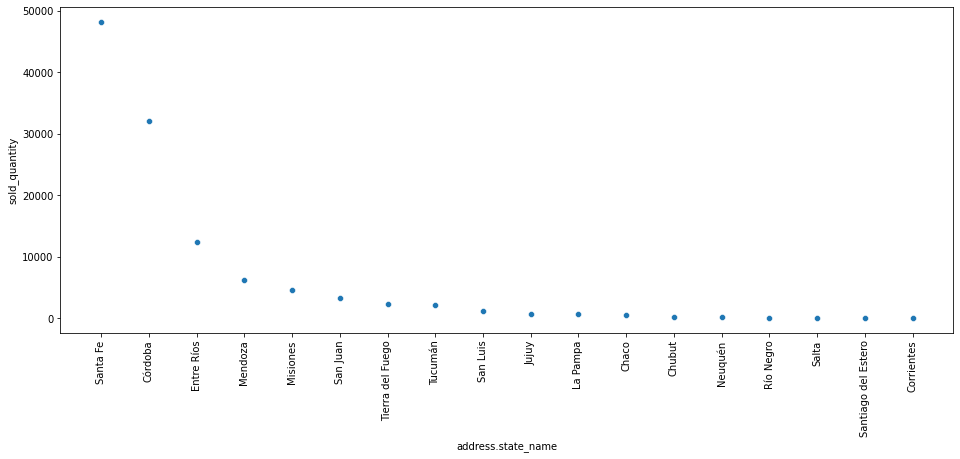

In [63]:
plt.figure(figsize=(16,6))

domain_df = cat_var_df.groupby("address.state_name").sum().reset_index().sort_values(by="sold_quantity", ascending=False).iloc[:25]
scat_plot = sns.scatterplot(x="address.state_name", y="sold_quantity", data=domain_df.iloc[2:])

for cat in scat_plot.get_xticklabels():
    cat.set_rotation(90)

#### La provincia en que tenga domicilio el vendedor parece ser un buen predictor. 

## Con estos datos voy a armar mi dataset de entrenamiento

In [64]:
model_df_cols = ["id", "sold_quantity", "price", "shipping.free_shipping", "seller.seller_reputation.metrics.claims.excluded.real_rate",
                  "seller.seller_reputation.transactions.completed", "seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value",
                  "seller.seller_reputation.metrics.cancellations.excluded.real_rate", "listing_type_id", 
                  "seller.seller_reputation.power_seller_status", "address.state_name"]

model_df = raw_dataset_df[model_df_cols]

In [65]:
model_df

,id,sold_quantity,price,shipping.free_shipping,seller.seller_reputation.metrics.claims.excluded.real_rate,seller.seller_reputation.transactions.completed,seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value,seller.seller_reputation.metrics.cancellations.excluded.real_rate,listing_type_id,seller.seller_reputation.power_seller_status,address.state_name
2,MLA618887655,500,53999.00,True,NaN,20342.0,5.0,NaN,gold_pro,platinum,Capital Federal
4,MLA841426834,500,1600.00,False,NaN,26441.0,NaN,NaN,gold_special,platinum,Capital Federal
5,MLA861922903,150,22167.29,True,0.0193,113679.0,1144.0,0.0103,gold_pro,platinum,Capital Federal
6,MLA879479401,5,94999.00,True,NaN,325323.0,NaN,NaN,gold_pro,platinum,Buenos Aires
7,MLA690368748,500,785.09,False,NaN,27010.0,NaN,NaN,gold_special,platinum,Capital Federal
...,...,...,...,...,...,...,...,...,...,...,...
10478,MLA678679714,500,2249.00,True,NaN,37897.0,NaN,NaN,gold_special,platinum,Capital Federal
10479,MLA858821035,100,2999.00,True,NaN,43051.0,NaN,NaN,gold_pro,platinum,Capital Federal
10480,MLA861128302,100,449.95,False,NaN,14593.0,NaN,NaN,gold_special,platinum,Entre Ríos
10481,MLA818759510,100,388.99,False,NaN,3972.0,NaN,NaN,gold_special,platinum,Capital Federal


In [66]:
model_df.count()

id                                                                            10080
sold_quantity                                                                 10080
price                                                                         10080
shipping.free_shipping                                                        10080
seller.seller_reputation.metrics.claims.excluded.real_rate                      451
seller.seller_reputation.transactions.completed                               10076
seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value      680
seller.seller_reputation.metrics.cancellations.excluded.real_rate               451
listing_type_id                                                               10080
seller.seller_reputation.power_seller_status                                   9842
address.state_name                                                            10080
dtype: int64

### A partir de las columnas con pocos registros, redefino mi df

In [67]:
model_df.drop(axis=1, labels=["seller.seller_reputation.metrics.claims.excluded.real_rate",
                             "seller.seller_reputation.metrics.delayed_handling_time.excluded.real_value",
                             "seller.seller_reputation.metrics.cancellations.excluded.real_rate"],
             inplace=True)

/home/eze/Desktop/Panza/virtual_envs/UWML_spec/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [68]:
model_df.count()

id                                                 10080
sold_quantity                                      10080
price                                              10080
shipping.free_shipping                             10080
seller.seller_reputation.transactions.completed    10076
listing_type_id                                    10080
seller.seller_reputation.power_seller_status        9842
address.state_name                                 10080
dtype: int64

In [69]:
model_df.dropna().count()

id                                                 9842
sold_quantity                                      9842
price                                              9842
shipping.free_shipping                             9842
seller.seller_reputation.transactions.completed    9842
listing_type_id                                    9842
seller.seller_reputation.power_seller_status       9842
address.state_name                                 9842
dtype: int64

In [70]:
model_df.dropna(inplace=True)

<ipython-input-70-717c3fa1ecda>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df.dropna(inplace=True)


## Feature Scaling

##### Hasta acá, no toqué los datos, sólo los analizé. A partir de acá, ya empiezo a manipularlos. Por eso es conveniente separar ahora mi training set de mi test set

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(model_df.drop(labels=["sold_quantity", "id"],axis=1),
                                                   model_df["sold_quantity"],
                                                   random_state=0,
                                                   test_size=0.2)

### A partir de ahora trabajo únicamente con X_train y y_train
##### (hasta el momento de probar el modelo)

### Ahora si, Feature Scaling
##### Las features a escalar son price y transactions.completed

In [73]:
from sklearn.preprocessing import MinMaxScaler

price_scaler = MinMaxScaler()
trans_scaler = MinMaxScaler()

price_scaler.fit(X_train["price"].values.reshape(-1, 1))
trans_scaler.fit(X_train["seller.seller_reputation.transactions.completed"].values.reshape(-1, 1))

MinMaxScaler()

In [74]:
def scale_df(input_df):
    """in: df
       out: df con las features escaladas"""
    global price_scaler, trans_scaler
    
    input_df["sc_price"]=price_scaler.transform(input_df["price"].values.reshape(-1, 1))
    input_df["sc_trans_completed"]=trans_scaler.transform(input_df["seller.seller_reputation.transactions.completed"].values.reshape(-1, 1))
    
    input_df.drop(labels=["seller.seller_reputation.transactions.completed", "price"], axis=1, inplace=True)
    
    return input_df

In [75]:
X_train = scale_df(X_train)

In [76]:
X_train

,shipping.free_shipping,listing_type_id,seller.seller_reputation.power_seller_status,address.state_name,sc_price,sc_trans_completed
1815,True,gold_special,platinum,Capital Federal,0.013284,0.186531
6981,False,gold_special,platinum,Capital Federal,0.003181,0.310575
7271,True,gold_special,platinum,Capital Federal,0.044608,0.016818
4102,False,gold_special,platinum,Capital Federal,0.001920,0.051495
7192,False,gold_special,silver,Buenos Aires,0.001238,0.000971
...,...,...,...,...,...,...
8321,False,gold_special,platinum,Buenos Aires,0.002642,0.027925
9813,True,gold_special,silver,Capital Federal,0.044956,0.000190
5091,False,gold_special,platinum,Capital Federal,0.000986,0.012563
3473,False,gold_pro,platinum,Capital Federal,0.004081,0.167136


### Siendo la target variable una variable categórica, convierto todos los valores que caigan fuera de las categorías de acuerdo a la documentación de la API. 

In [77]:
def sorter_func(value):
    if value <= 5:
        return value
    elif value < 26:
        return 5
    elif value < 51:
        return 25
    elif value < 101:
        return 50
    elif value < 151:
        return 100
    elif value < 201:
        return 150
    elif value < 251:
        return 200
    elif value < 500:
        return 250
    else:
        return value

In [78]:
y_train = y_train.apply(sorter_func)
# Lo casteo como string para evitar confusiones. Los números representan categorías (o bins)
y_train = y_train.astype("string")

In [79]:
y_train

1815    100
6981     25
7271     50
4102    150
7192    150
       ... 
8321    500
9813      4
5091    100
3473    500
2920    500
Name: sold_quantity, Length: 7873, dtype: string

In [80]:
y_train.groupby(y_train).count()

sold_quantity
0         6
1        24
100     463
150     418
2        19
200    1611
25      485
250       5
3        25
4        26
5       667
50      477
500    3647
Name: sold_quantity, dtype: int64

### Como se van a utilizar los campos en el dataframe como features, no es necesario pensar un feature extractor. 
### Pero va a ser necesario codificar las variables categóricas

In [81]:
from sklearn.preprocessing import LabelEncoder

In [82]:
#listing_type_id 	seller.seller_reputation.power_seller_status 	address.state_name
listing_encoder = LabelEncoder()
status_encoder = LabelEncoder()
address_encoder = LabelEncoder()

# Notar que, como no estoy escalando las features, hago el fit con el DF completo para que agarre todas las categorías posibles.
listing_encoder.fit(model_df["listing_type_id"].values.reshape(-1,1))
status_encoder.fit(model_df["seller.seller_reputation.power_seller_status"].values.reshape(-1,1))
address_encoder.fit(model_df["address.state_name"].values.reshape(-1,1))

/home/eze/Desktop/Panza/virtual_envs/UWML_spec/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LabelEncoder()

In [83]:
def encode_categories(input_df):
    """Take categorical variables and encode them so they can be fed to an algorithm
    Si no quiero que modifique el df original, tengo que hacer un copy acá, adentro de la function"""
    
    input_df["enc_status"] = status_encoder.transform(input_df["seller.seller_reputation.power_seller_status"].values.reshape(-1,1))
    input_df["enc_listing"] = listing_encoder.transform(input_df["listing_type_id"].values.reshape(-1,1))
    input_df["enc_address"] = address_encoder.transform(input_df["address.state_name"].values.reshape(-1,1))
    
    input_df.drop(labels=["seller.seller_reputation.power_seller_status", "listing_type_id", "address.state_name"],
                 axis=1,
                 inplace=True)
    
    return input_df
    

In [87]:
X_train = encode_categories(X_train)
X_train

/home/eze/Desktop/Panza/virtual_envs/UWML_spec/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


,shipping.free_shipping,sc_price,sc_trans_completed,enc_status,enc_listing,enc_address
1815,True,0.013284,0.186531,1,1,1
6981,False,0.003181,0.310575,1,1,1
7271,True,0.044608,0.016818,1,1,1
4102,False,0.001920,0.051495,1,1,1
7192,False,0.001238,0.000971,2,1,0
...,...,...,...,...,...,...
8321,False,0.002642,0.027925,1,1,0
9813,True,0.044956,0.000190,2,1,1
5091,False,0.000986,0.012563,1,1,1
3473,False,0.004081,0.167136,1,0,1



## Pasamos a la construcción de un modelo

#### Se prueban distintos algoritmos para clasificación multiclase. 

In [88]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [89]:
gauss_nb = GaussianNB()
gauss_nb.fit(X_train, y_train)

log_reg = LogisticRegression(multi_class="auto")
log_reg.fit(X_train, y_train)

svc = SVC(kernel="rbf")  # C y gamma quedarán para la etapa de tuning con gridsearch. 
svc.fit(X_train, y_train)

/home/eze/Desktop/Panza/virtual_envs/UWML_spec/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC()

#### Ya está creado y fitteados los modelos. Ahora hay que hacer la predicción

#### Ahora, para hacer la predicción, primero va a ser necesario pasar X_test y y_test por los mismos procesos que pasaron X_train y y_train

In [90]:
def transform_pipeline(X, y):
    """Input: raw X and y.
        Output: X and y ready to be fed to an algorithm"""
    
    # y transform
    y = y.apply(sorter_func)
    # Lo casteo como string para evitar confusiones. Los números representan categorías (o bins)
    y = y.astype("string")
    
    # x transform
    X = scale_df(X)
    X = encode_categories(X)
    
    return X, y

In [91]:
X_test, y_test = transform_pipeline(X_test, y_test)

/home/eze/Desktop/Panza/virtual_envs/UWML_spec/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Predicciones

In [92]:
y_pred_gauss = gauss_nb.predict(X_test)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_svc = svc.predict(X_test)

### Performance metrics

In [93]:
from sklearn.metrics import precision_score, recall_score, multilabel_confusion_matrix, confusion_matrix
from sklearn.metrics import jaccard_score  # menos trabajo que accuracy


#### Gaussian Naive Bayes

#### Accuracy and precision

In [94]:
jaccard_score(y_test, y_pred_gauss, average=None)  # Accuracy

array([0.00507614, 0.        , 0.        , 0.02255639, 0.        ,
       0.        , 0.00819672, 0.00125313, 0.0625    , 0.05882353,
       0.18309859, 0.        , 0.38951613])

In [95]:
# tp / (tp + fp)
precision_score(y_test, y_pred_gauss, average=None)  # Precision

/home/eze/Desktop/Panza/virtual_envs/UWML_spec/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.00507614, 0.        , 0.        , 0.12      , 0.        ,
       0.        , 0.11111111, 0.00125313, 0.08333333, 0.11111111,
       0.46428571, 0.        , 0.58902439])

In [96]:
# tp / (tp + fn)
recall_score(y_test, y_pred_gauss, average=None)  # Recall

array([1.        , 0.        , 0.        , 0.02702703, 0.        ,
       0.        , 0.00877193, 1.        , 0.2       , 0.11111111,
       0.23214286, 0.        , 0.53488372])

### Ok... resultado horrible... 

In [97]:
# Para explicar los 1 y los 0 en recall y accuracy. 
multilabel_confusion_matrix(y_test, y_pred_gauss)

array([[[1772,  196],
        [   0,    1]],

       [[1962,    0],
        [   7,    0]],

       [[1834,    0],
        [ 135,    0]],

       [[1836,   22],
        [ 108,    3]],

       [[1947,   14],
        [   8,    0]],

       [[1589,    0],
        [ 380,    0]],

       [[1847,    8],
        [ 113,    1]],

       [[1171,  797],
        [   0,    1]],

       [[1953,   11],
        [   4,    1]],

       [[1952,    8],
        [   8,    1]],

       [[1756,   45],
        [ 129,   39]],

       [[1841,    1],
        [ 127,    0]],

       [[ 729,  337],
        [ 420,  483]]])

### Confusion Matrix

In [108]:
# OJO: en sklearn el eje y tiene actual y en el eje x tiene predicted
y_test.groupby(y_test).count()

sold_quantity
0        1
1        7
100    135
150    111
2        8
200    380
25     114
250      1
3        5
4        9
5      168
50     127
500    903
Name: sold_quantity, dtype: int64

In [98]:
confusion_matrix(y_test, y_pred_gauss)  # Esta es la confusion matrix grande. 

array([[  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   2,   0,   2,   0,   0],
       [ 14,   0,   0,   2,   0,   0,   1,  65,   1,   1,   8,   0,  43],
       [ 10,   0,   0,   3,   1,   0,   0,  58,   0,   1,   3,   0,  35],
       [  3,   0,   0,   0,   0,   0,   0,   2,   0,   0,   3,   0,   0],
       [ 25,   0,   0,   5,   1,   0,   2, 162,   0,   0,   5,   0, 180],
       [ 26,   0,   0,   2,   1,   0,   1,  46,   1,   1,   7,   1,  28],
       [  0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   1,   1,   0,   1,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0,   1,   0,   1,   3,   0,   0],
       [ 45,   0,   0,   1,   7,   0,   2,  59,   6,   2,  39,   0,   7],
       [ 18,   0,   0,   1,   1,   0,   1,  57,   0,   1,   4,   0,  44],
       [ 46,   0,   0,  11,   3,   0,   2, 346,   1,   2,   9,   0, 483]])

### Micro and Macro Average

#### Uno tiene en cuenta el peso de la clase, y el otro evalúa globalmente (independiente de la clase)

In [99]:
precision_score(y_test, y_pred_gauss, average="micro")
# (TP1+TP2)/(TP1+TP2+FP1+FP2)

0.2691721686135094

In [100]:
precision_score(y_test, y_pred_gauss, average="macro")
# (P1+P2)/2

0.11424576423455632

##### En la micro annduvo mejor que en la macro. O sea, erró mucho en general. Pero en algunas categorías con menor peso anduvo más o menos bien, que sube el promedio micro

## Búsqueda de parámetros para optimizar el SVC

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
params_to_sweep = {"C":[1, 10], "gamma":[1, 10]}
gs = GridSearchCV(svc, params_to_sweep)

In [103]:
gs.fit(X_train, y_train)

GridSearchCV(estimator=SVC(), param_grid={'C': [1, 10], 'gamma': [1, 10]})

In [104]:
gs.best_params_

{'C': 10, 'gamma': 10}

In [105]:
gs.best_estimator_  # Obvio... si le pasé un solo estimator...

SVC(C=10, gamma=10)

In [106]:
gs.cv_results_

{'mean_fit_time': array([1.16519518, 1.48603973, 1.55931587, 2.31606331]),
 'std_fit_time': array([0.02973866, 0.02841739, 0.05152798, 0.16456677]),
 'mean_score_time': array([0.18349161, 0.19372158, 0.1860888 , 0.19506688]),
 'std_score_time': array([0.00131685, 0.00117344, 0.00129458, 0.00256785]),
 'param_C': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[1, 10, 1, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'gamma': 1},
  {'C': 1, 'gamma': 10},
  {'C': 10, 'gamma': 1},
  {'C': 10, 'gamma': 10}],
 'split0_test_score': array([0.49396825, 0.50285714, 0.50730159, 0.50666667]),
 'split1_test_score': array([0.48634921, 0.49269841, 0.4984127 , 0.50222222]),
 'split2_test_score': array([0.49587302, 0.50666667, 0.50857143, 0.51238095]),
 'split3_test_score': array([0.4841169 , 0.49618806,